In [ ]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
df = pd.read_csv("sales_data_with_discounts.csv")


df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [15]:
#mean median and mode values]
numerical_cols= df.select_dtypes(include=[np.number]).columns
mean_vals = df[numerical_cols].mean()
median_vals= df[numerical_cols].median()
mode_vals= df[numerical_cols].mode()
std_vals = df[numerical_cols].std()

print("Mean values:\n", mean_vals)
print("\nmode values:\n", median_vals)
print("\nmode values:\n", mode_vals)
print("\n standard values:\n", std_vals)


Mean values:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

mode values:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

mode values:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0       3.0      400.0            24300.0           5.007822        69.177942   
1       NaN      450.0                NaN           5.055218        73.025199   
2       NaN      500.0                NaN           5.059801        93.649161   
3       NaN     1300.0                NaN           5.072124        94.682735   
4       NaN     8100.0                NaN           5.084108       102.705757   
..      ...        ...                

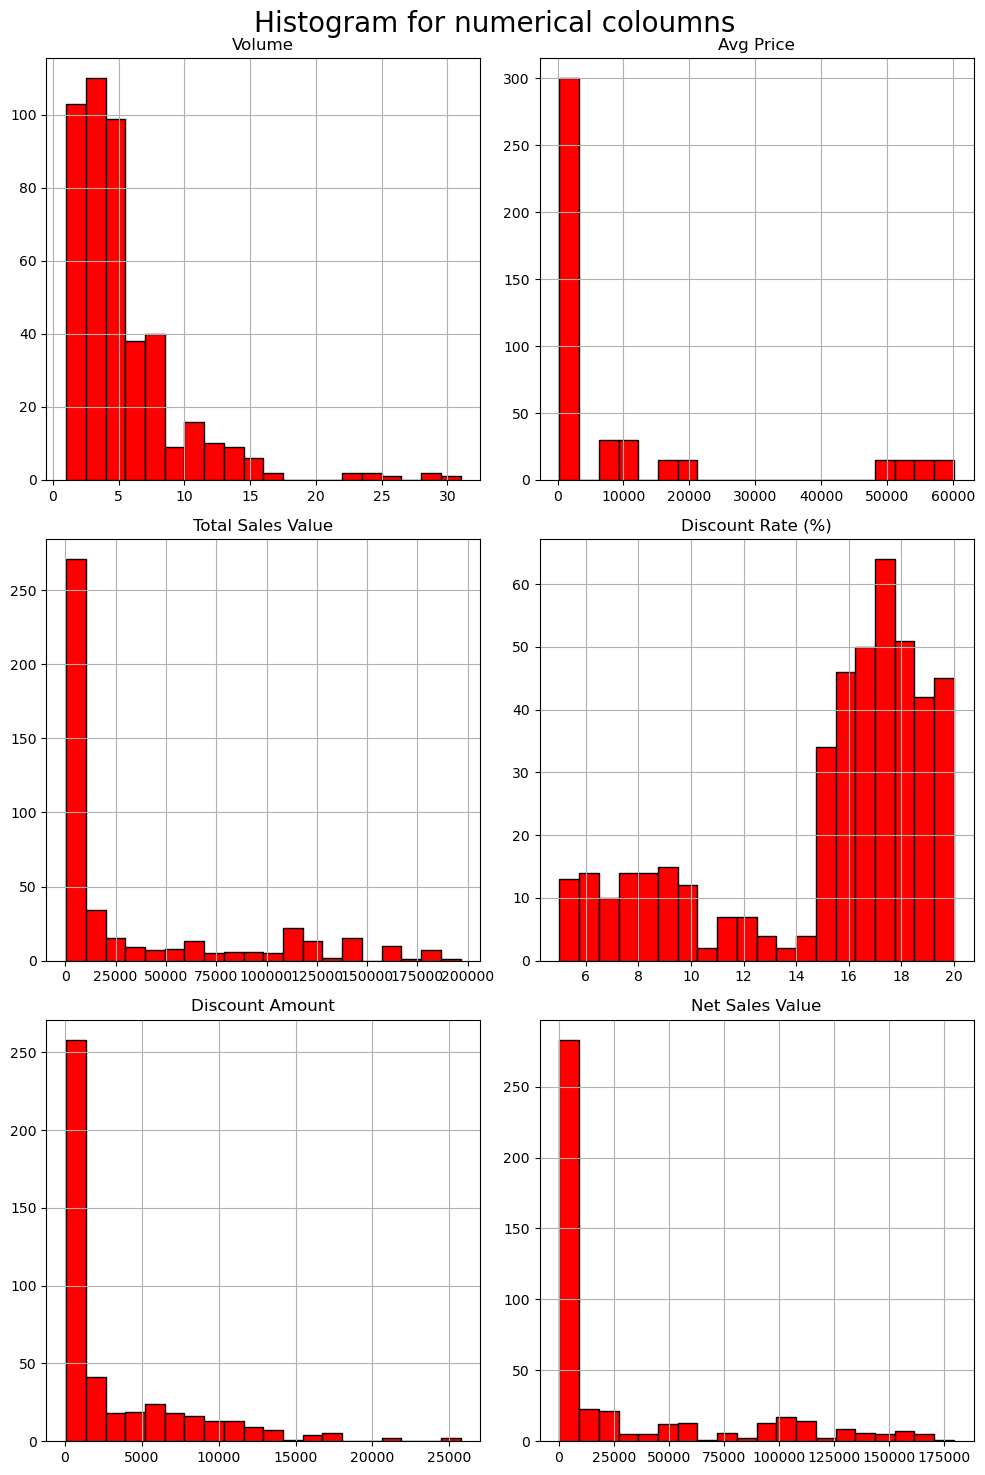

In [23]:
#creating histogram for all numeric colomns 
numerical_cols= df.select_dtypes(include=[np.number]).columns
df[numerical_cols].hist(bins= 20, figsize=(10,15), color = 'red', edgecolor= 'black')
plt.suptitle('Histogram for numerical coloumns', fontsize =20)
plt.tight_layout()
plt.show()

### Boxplot

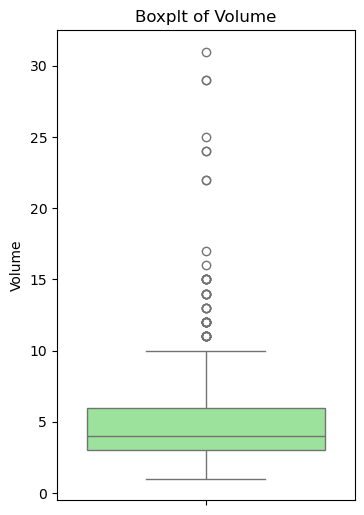

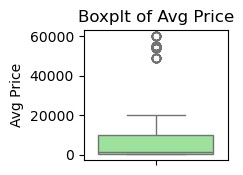

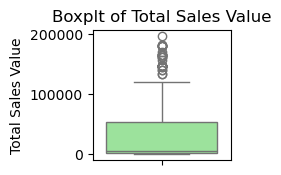

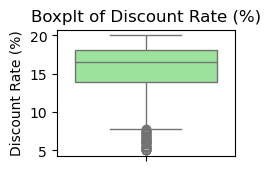

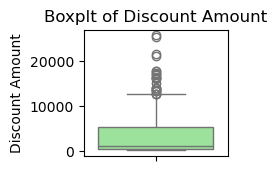

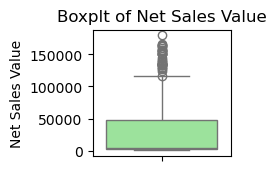

In [ ]:
#boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+ 1)
    sns.boxplot(y=df[col],color='lightgreen')
    plt.title(f'Boxplt of {col}')
    plt.tight_layout()
    plt.show()

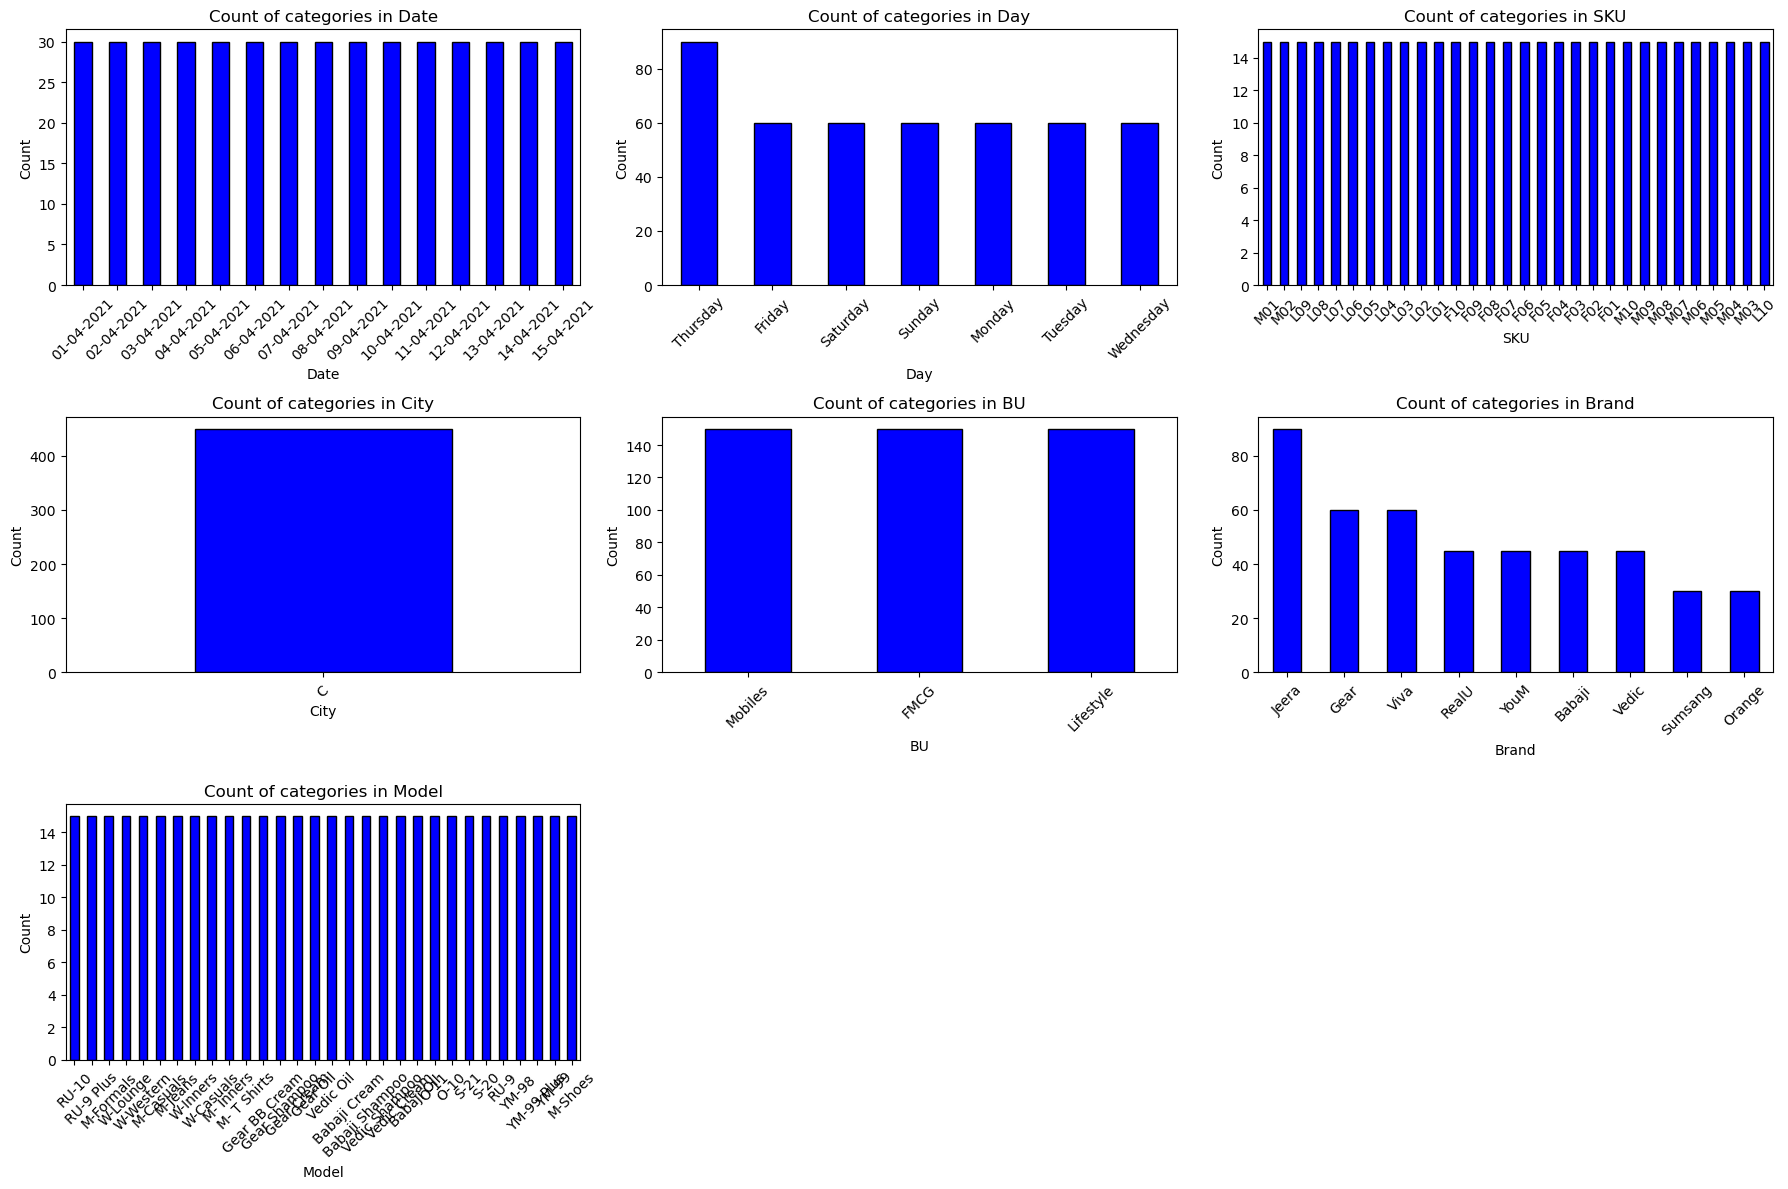

In [ ]:
# Bar charts

import matplotlib.pyplot as plt
import math

# Set number of columns in the subplot grid
cols = 3
# Dynamically calculate the number of required rows
rows = math.ceil(len(categorical_cols) / cols)

plt.figure(figsize=(6 * cols, 4 * rows))  # Adjust figure size based on grid

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)
    df[col].value_counts().plot(kind='bar', color='blue', edgecolor='black')
    plt.title(f'Count of categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Standardization of Numerical Variables
Standardization rescales the data using the formula z = (x - mean) / std. This helps improve model performance by making features comparable.


Below we visualize the distributions before and after standardization.

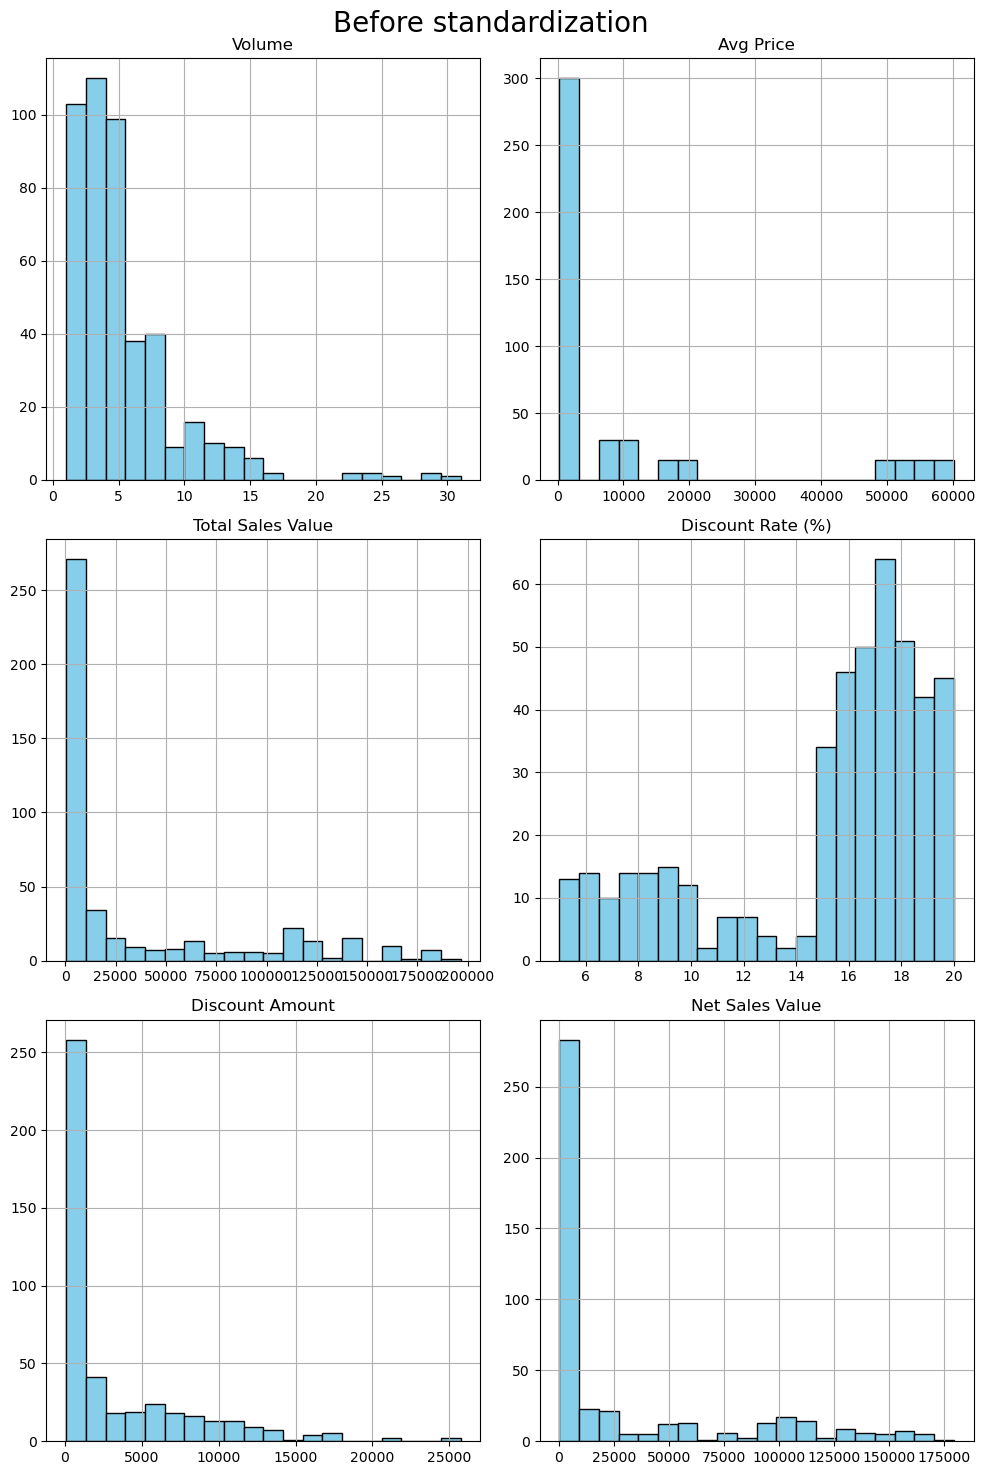

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sales_data_with_discounts.csv')


numerical_cols = df.select_dtypes(include =[np.number]).columns

df[numerical_cols].hist(bins= 20, figsize=(10,15), color= 'skyblue', edgecolor= 'black') 
plt.suptitle('Before standardization ', fontsize =20)
plt.tight_layout()
plt.show()

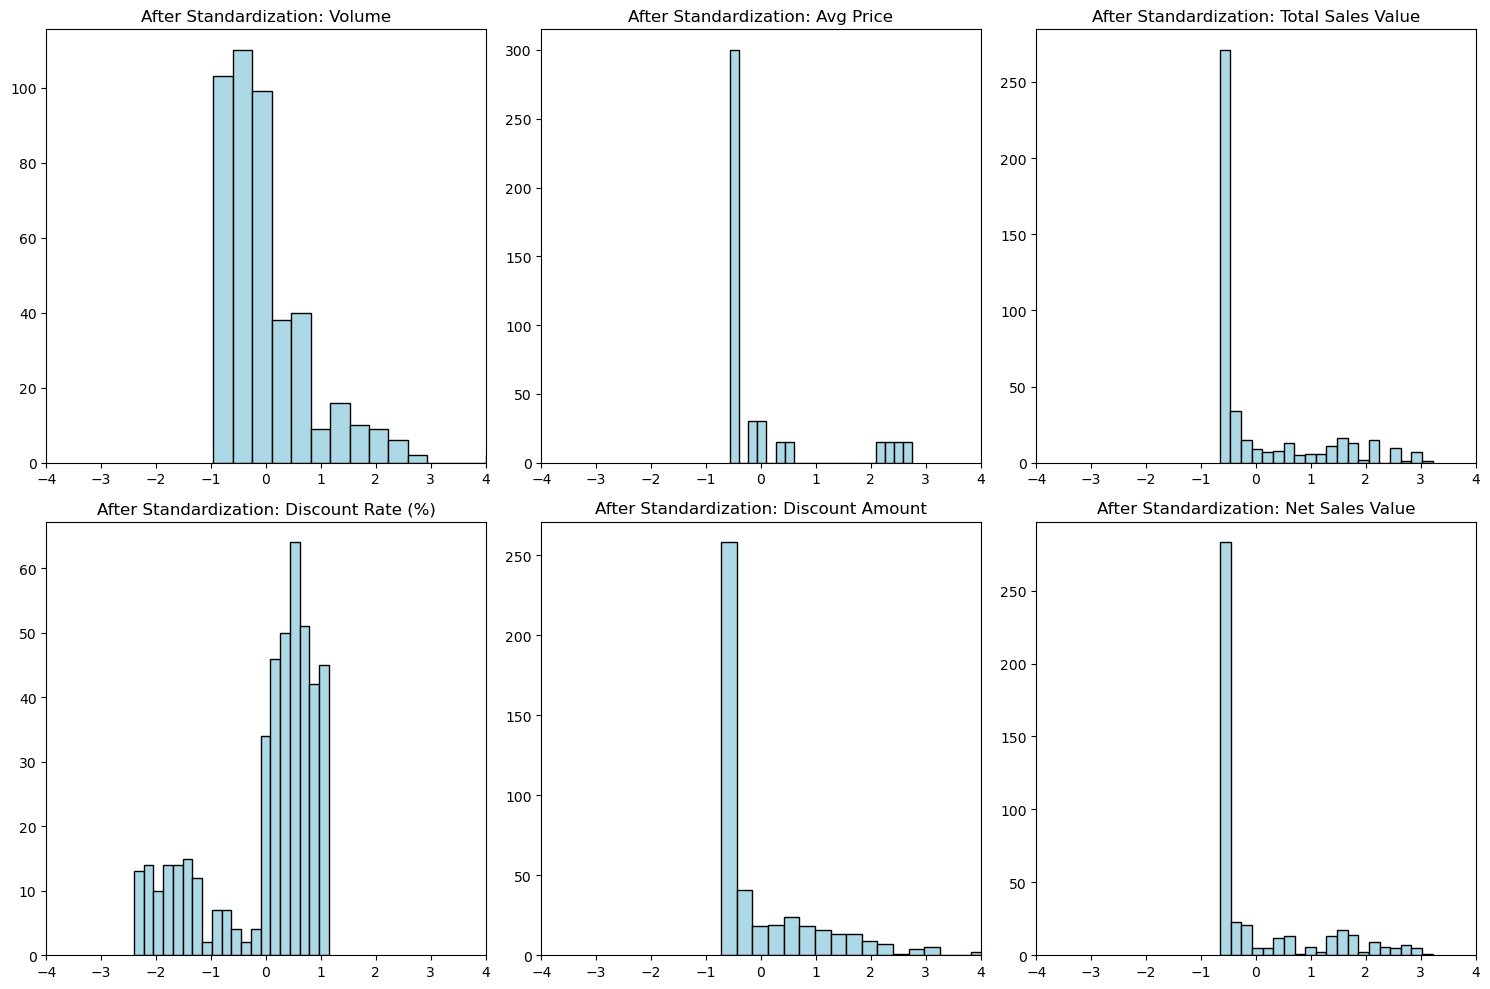

In [15]:
# Plot histograms after standardization with fixed x-axis limits (-4 to 4)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Adjust rows and cols based on number of numerical columns
    plt.hist(scaled_df[col], bins=20, color='lightblue', edgecolor='black')
    plt.title(f'After Standardization: {col}')
    plt.xlim(-4, 4)  # Most standardized values fall within this range
plt.tight_layout()
plt.show()


HOT ENCODING 

In [19]:
categorical_cols= df.select_dtypes(include=['category', 'object']).columns
#Hot encoding
df_encoded = pd.get_dummies(df, columns= categorical_cols, drop_first=True)

df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


- Summary Statistics  
- Bar Charts for Categorical Columns  
- Histograms (Before & After Standardization)  
- Standardization using Z-score  
- One-Hot Encoding of Categorical Variables
